<a href="https://colab.research.google.com/github/samiha-mahin/WaterQuality/blob/main/WQ_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

# Step 1: Load the dataset
df = pd.read_csv("cleaned_data.csv")

# Step 2: Feature Engineering
df["Solids_per_Hardness"] = df["Solids"] / (df["Hardness"] + 1e-5)
df["pH_Turbidity"] = df["ph"] * df["Turbidity"]
df["Sulfate_Chloramines"] = df["Sulfate"] * df["Chloramines"]

# Step 3: Split features and target
X = df.drop("Potability", axis=1)
y = df["Potability"]

# Step 4: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

# Step 7: Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_resampled, y_resampled)

# Step 8: Predict and evaluate
y_pred = dt_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Decision Tree Accuracy:", accuracy)
print("Classification Report:\n", report)


Decision Tree Accuracy: 0.5990415335463258
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.59      0.65       394
           1       0.47      0.62      0.53       232

    accuracy                           0.60       626
   macro avg       0.60      0.60      0.59       626
weighted avg       0.63      0.60      0.61       626



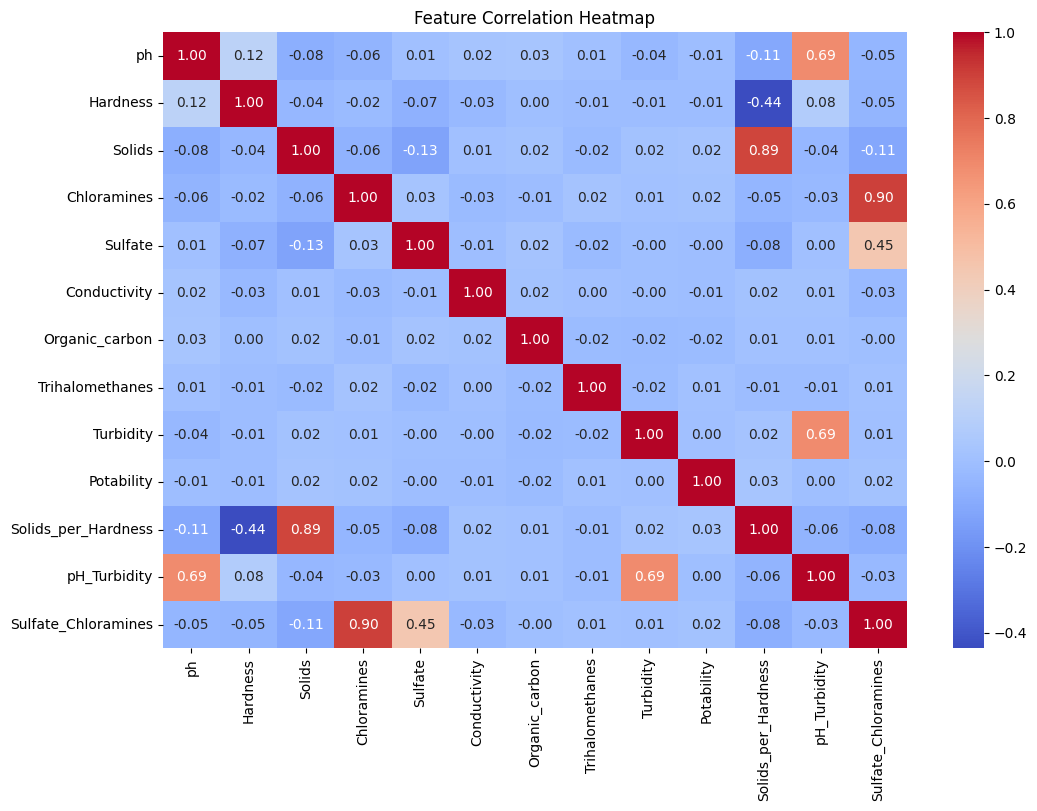

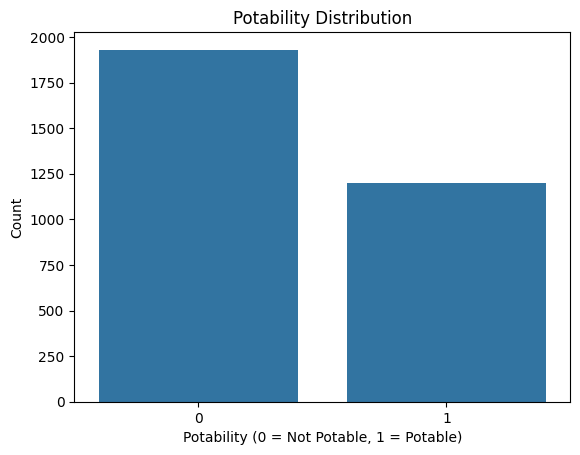

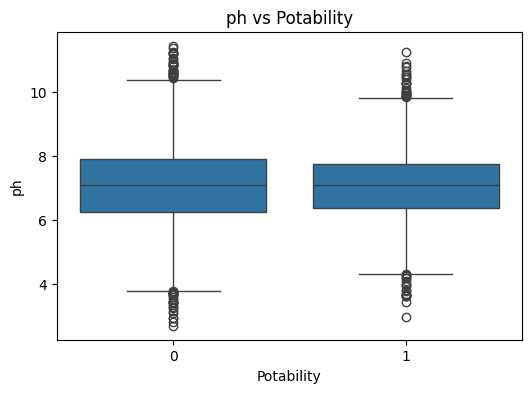

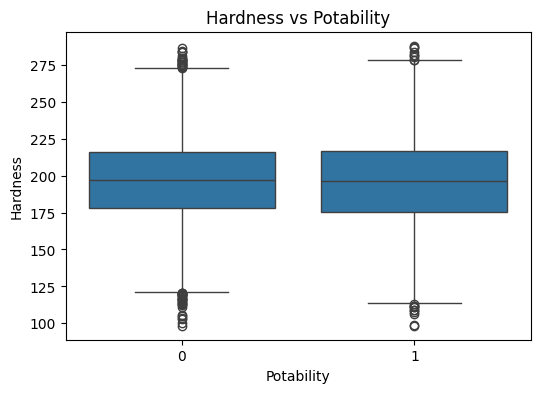

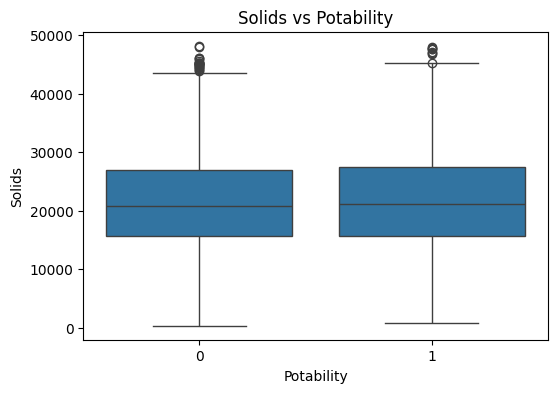

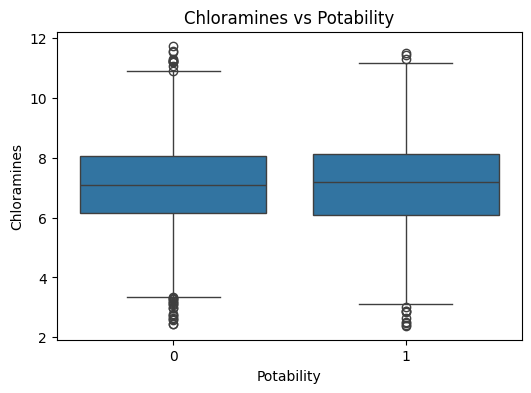

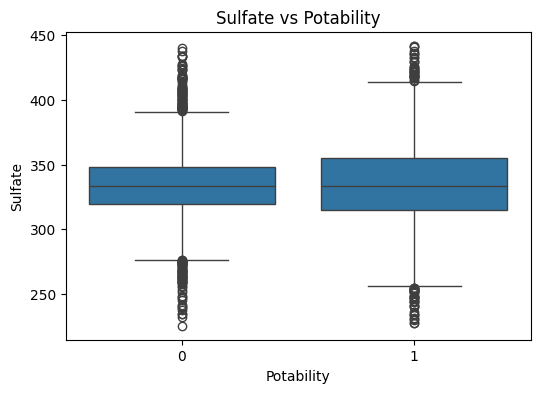

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()
sns.countplot(x='Potability', data=df)
plt.title("Potability Distribution")
plt.xlabel("Potability (0 = Not Potable, 1 = Potable)")
plt.ylabel("Count")
plt.show()
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Potability', y=col, data=df)
    plt.title(f"{col} vs Potability")
    plt.show()
